<a href="https://colab.research.google.com/github/dupls13/Projects/blob/main/Algorithm_Trading_Strategy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import pandas as pd 
import numpy as np 
from datetime import datetime 
import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight') 

In [22]:
from google.colab import files 
uploaded = files.upload()

Saving AAPL.csv to AAPL (1).csv


In [27]:
#Store the data 
AAPL = pd.read_csv('AAPL.csv')
AAPL

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-02-06,80.642502,81.305000,80.065002,81.302498,80.486107,105425600
1,2020-02-07,80.592499,80.849998,79.500000,80.007500,79.392090,117684000
2,2020-02-10,78.544998,80.387497,78.462502,80.387497,79.769165,109348800
3,2020-02-11,80.900002,80.974998,79.677498,79.902496,79.287888,94323200
4,2020-02-12,80.367500,81.805000,80.367500,81.800003,81.170799,113730400
...,...,...,...,...,...,...,...
248,2021-02-01,133.750000,135.380005,130.929993,134.139999,133.939850,106239800
249,2021-02-02,135.729996,136.309998,134.610001,134.990005,134.788589,83305400
250,2021-02-03,135.759995,135.770004,133.610001,133.940002,133.740158,89880900
251,2021-02-04,136.300003,137.399994,134.589996,137.389999,137.184998,83946000


<function matplotlib.pyplot.show>

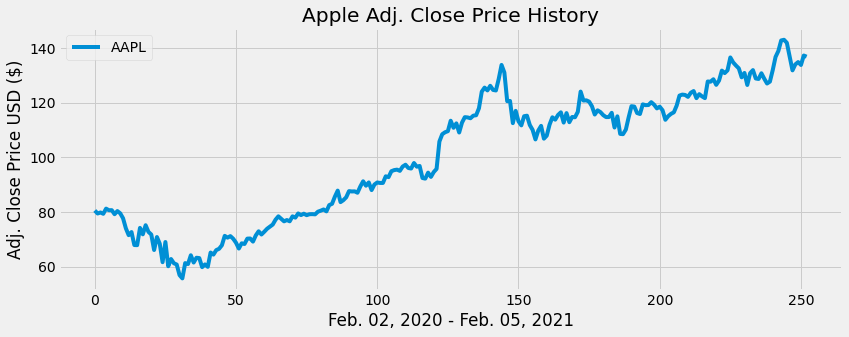

In [33]:
#visualize the data 
plt.figure(figsize=(12.5, 4.5))
plt.plot(AAPL['Adj Close'], label= 'AAPL')
plt.title ('Apple Adj. Close Price History')
plt.xlabel('Feb. 02, 2020 - Feb. 05, 2021')
plt.ylabel('Adj. Close Price USD ($)')
plt.legend(loc='upper left')
plt.show

In [38]:
#Create the simple moving average with a 30 window 
SMA30 = pd.DataFrame()
SMA30['Adj Close'] = AAPL['Adj Close'].rolling(window = 30).mean()
SMA30

,Adj Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
248,132.409140
249,132.618494
250,132.860799
251,133.165677


In [41]:
#Create a simple mean 100 day average 
SMA100=pd.DataFrame()
SMA100['Adj Close'] = AAPL['Adj Close'].rolling(window=100).mean()
SMA100

,Adj Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
248,121.308157
249,121.486611
250,121.692758
251,121.948205


<function matplotlib.pyplot.show>

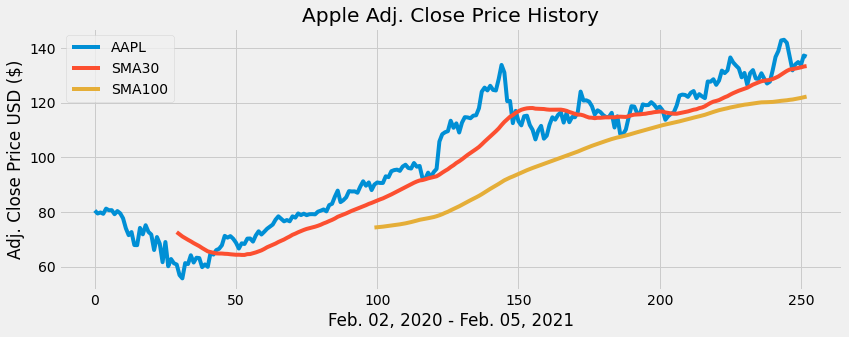

In [42]:
#Visualize the data 
plt.figure(figsize=(12.5, 4.5))
plt.plot(AAPL['Adj Close'], label= 'AAPL')
plt.plot(SMA30['Adj Close'], label = 'SMA30')
plt.plot(SMA100['Adj Close'], label = 'SMA100')
plt.title ('Apple Adj. Close Price History')
plt.xlabel('Feb. 02, 2020 - Feb. 05, 2021')
plt.ylabel('Adj. Close Price USD ($)')
plt.legend(loc='upper left')
plt.show

In [43]:
#Create a new data frame to sore all the data 
data = pd.DataFrame()
data['AAPL'] = AAPL['Adj Close']
data['SMA30'] = SMA30['Adj Close']
data['SMA100'] = SMA100['Adj Close']
data


,AAPL,SMA30,SMA100
0,80.486107,NaN,NaN
1,79.392090,NaN,NaN
2,79.769165,NaN,NaN
3,79.287888,NaN,NaN
4,81.170799,NaN,NaN
...,...,...,...
248,133.939850,132.409140,121.308157
249,134.788589,132.618494,121.486611
250,133.740158,132.860799,121.692758
251,137.184998,133.165677,121.948205


In [67]:
#Create function to signal when to buy and sell the stock 
def buy_sell(data): 
  sigPriceBuy = []
  sigPriceSell = []
  flag = -1

  for i in range(len(data)): 
    if data ['SMA30'] [i] > data['SMA100'][i]:
      if flag !=1:
        sigPriceBuy.append(data['AAPL'][i])
        sigPriceSell.append(np.nan)
        flag = 1
      else:
        sigPriceBuy.append(np.nan) 
        sigPriceSell.append(np.nan)
    elif data ['SMA30'][i] < data ['SMA100'][i]:
      if flag !=0:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(data['AAPL'][i])
        flag = 0
      else: 
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
    else: 
      sigPriceBuy.append(np.nan)
      sigPriceSell.append(np.nan)

  return(sigPriceBuy, sigPriceSell)
      

In [68]:
#Store the buy and sell data into a variable 
buy_sell = buy_sell(data)
data['Buy_Signal_Price'] = buy_sell[0]
data['Sell_Signal_Price'] = buy_sell[1]

In [69]:
#Show the data 
data

,AAPL,SMA30,SMA100,Buy_Signal_Price,Sell_Signal_Price
0,80.486107,NaN,NaN,NaN,NaN
1,79.392090,NaN,NaN,NaN,NaN
2,79.769165,NaN,NaN,NaN,NaN
3,79.287888,NaN,NaN,NaN,NaN
4,81.170799,NaN,NaN,NaN,NaN
...,...,...,...,...,...
248,133.939850,132.409140,121.308157,NaN,NaN
249,134.788589,132.618494,121.486611,NaN,NaN
250,133.740158,132.860799,121.692758,NaN,NaN
251,137.184998,133.165677,121.948205,NaN,NaN


<function matplotlib.pyplot.show>

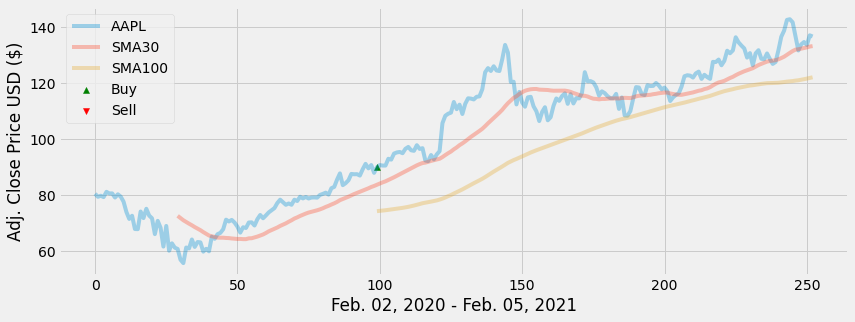

In [71]:
#Visualize the data and the strategy to buy and sel stock 
plt.figure(figsize = (12.6, 4.6))
plt.plot(data['AAPL'], label = 'AAPL', alpha = 0.35)
plt.plot(data['SMA30'], label ='SMA30', alpha = 0.35)
plt.plot(data['SMA100'], label  = 'SMA100', alpha = 0.35)
plt.scatter(data.index, data ['Buy_Signal_Price'], label ='Buy', marker = '^', color = 'green')
plt.scatter(data.index, data["Sell_Signal_Price"], label ="Sell", marker = 'v', color = 'red')
plt.xlabel('Feb. 02, 2020 - Feb. 05, 2021')
plt.ylabel('Adj. Close Price USD ($)')
plt.legend(loc='upper left')
plt.show